<a href="https://colab.research.google.com/github/AsadShibli/asad/blob/master/assignment_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
import random

In [5]:
import zipfile

# Specify the path to the ZIP file you want to extract
file_path = "/content/Assignment.zip"

# Specify the directory where you want to extract the contents
file_extraction_dir = '/content/'

# Open the ZIP file in read-only mode using a context manager
with zipfile.ZipFile(file_path, "r") as file_ref:

    # Extract all files and directories from the ZIP file to the specified extraction directory
    file_ref.extractall(file_extraction_dir)

# At this point, the contents of the ZIP file have been extracted to the specified directory.


In [6]:
from glob import glob

# Specify the data path
data_path = "/content/Assignment"

# Get a sorted list of subdirectories in the data path (assuming each subdirectory corresponds to a category)
datat = np.sort(np.array(glob(data_path + "/*")))

# Now 'datat' contains a sorted list of subdirectory paths, each representing a category or label


In [7]:
def get_data(datat):
    # Initialize empty lists to store image paths and labels
    img_dir = list()
    label = list()

    # Loop through each folder in datat
    for j in range(len(datat)):
        # Get a sorted list of image paths within the current folder
        img_per_folder = np.sort(np.array(glob(datat[j] + "/*")))

        # Shuffle the image paths within the current folder
        random.shuffle(img_per_folder)

        # Iterate through the shuffled image paths
        for i in range(len(img_per_folder)):
            # Append the image path to the img_dir list
            img_dir.append(img_per_folder[i])

            # Append the label (index of the current folder) to the label list
            label.append(j)

    # Convert the lists to NumPy arrays and return them
    return np.array(img_dir), np.array(label)


In [8]:
# Usage of the get_data function
tdr1, tdr2 = get_data(datat)

In [41]:
import cv2  # Import the OpenCV library
import numpy as np  # Import the NumPy library

final_img = []  # Create an empty list to store the processed images

# Iterate through the list of image file paths
for i in range(len(tdr1)):
    # Read the image using OpenCV
    img = cv2.imread(tdr1[i])

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Normalize the pixel values by dividing by 255 to bring them into the [0, 1] range
    img = img / 255.0

    # Resize the image to a fixed size of (224, 224)
    img = cv2.resize(img, (224, 224))

    # Append the processed image to the list
    final_img.append(img)

# Convert the list of processed images into a NumPy array
final_img = np.array(final_img)


In [42]:
import tensorflow as tf

# Convert the labels in tdr2 to one-hot encoded format
label = tf.keras.utils.to_categorical(
    tdr2 , len(tdr2)
)


In [43]:
label

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

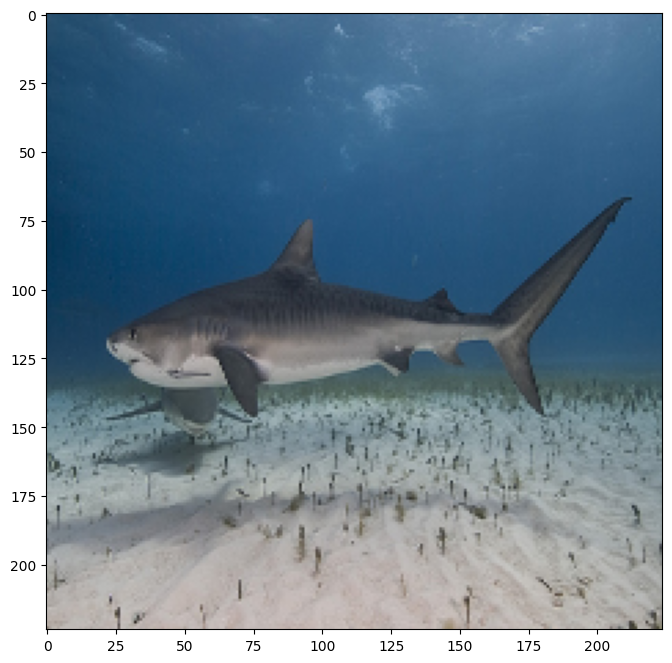

In [44]:
import cv2
import matplotlib.pyplot as plt


# Create a larger figure
plt.figure(figsize=(8, 8))

# Display the image
plt.imshow(final_img[100])
plt.show()


In [ ]:
|